# <center>Deep Neural Networks and how they may be of use to Shred-it and Strericycle</center>
<center><img src='./images/alina-grubnyak-1254787-unsplash_small.jpg' height='300' width='1350'></center>
<small>Anthony Wynne November 2019  

Photo by <a href="https://unsplash.com/@alinnnaaaa">Alina Grubnyak</a> on <a href="https://unsplash.com/" >Unsplash</a> </small>

## What is a Deep Neural Network?
* A Deep Neural Network (DNN) is a type of artificial neural network inspired by biological neural systems. The data travels through layers of artificial neurons called nodes, to an output layer.  
<center><img src='./images/DNN_diagram.png'></center>

* Each connection in the network has a weight and each neuron has a bias value. The layers between the input and output layers are called hidden layers, typically a DNN will have many (5 - 100) hidden layers.
<center><img src='./images/DNN_diagram.png' height='300'></center>

* The state of these nodes is adjusted to reflect the probability that the outputs match the target labels of the training data. 
<center><img src='./images/DNN_diagram.png'></center>

<img src="./images/artificialneuron.png" width="600" align="left"><img src="./images/activation_functions.png" width="600" align="right">

## The Standard Machine Learning Approach

<img src="./images/sklearn.png" width='1200' align='center'> 



## Why use a deep learning approach?     

<img src="./images/deep_learning.jpg" width='800' align='center'>

## Deep Learning  Pro's and Con's  
* Slow to train - Fast to execute  
* Hard to understand how the model makes its predictions - Data requires little preparation, no feature engineering required

## DNN Possible Business Uses  
* A DNN clustering model can segment customers by data similarities
* Predict current known customer segments for new customers
* Product recommendation system
* Discover previously hidden segments  
* Pattern discovery
* Hypothesis generation and testing

## Practical Examples  
1) Pattern recognition  
2) Classification to discover patterns     

## The Data  
* I will use the MNIST image dataset to demonstrate these pattern recognition concepts.  
* It contains 70,000 images of handwritten digits.  
* Each image is 28 pixels by 28 pixels.
* This produces 784 data points of the greyscale pixel values from 0 to 255.  
<img src="./images/mnist_digit2.png" width=130 height=130 align='left'> <img src="./images/mnist_digit6.png" width=130 height=130 align='left'><img src="./images/mnist_digit0.png" width=130 height=130 align='left'><img src="./images/mnist_digit7.png" width=130 height=130 align='left'><img src="./images/mnist_digit8.png" width=130 height=130 align='left'><img src="./images/mnist_digit3.png" width=130 height=130 align='left'><img src="./images/mnist_digit4.png" width=130 height=130 align='left'>

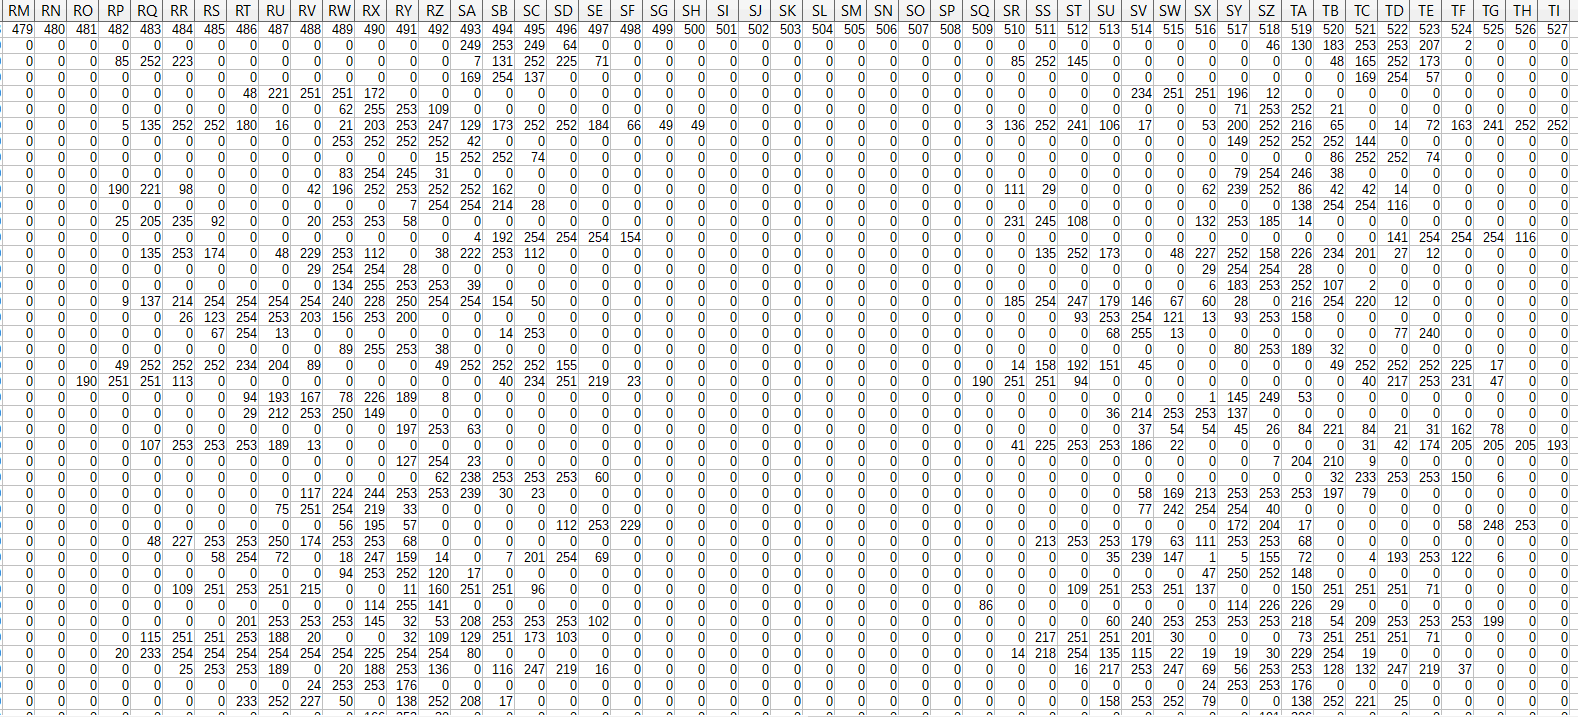

In [1]:
# load the open ml module
from sklearn.datasets import fetch_openml
# import the pandas  and numpy modules
import pandas as pd
import numpy as np

# import the MNIST data arrays from open ml X=features y=target label
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# create a dataframe
# df_X = pd.DataFrame(X)
# df_X['y'] = y
# save to a csv for presentation (in case of no wifi!)
# df_X.to_csv('./X.csv', index=False)

In [2]:
# load the data back in from the csv
df_X = pd.read_csv('./X.csv')
# what shape is the data frame
print('Data Shape:', df_X.shape)
# show the max and min of the first row of the data
print('Data Max:', df_X.drop(['y'], axis=1).to_numpy().max())
print('Data Min', df_X.drop(['y'], axis=1).to_numpy().min())
print('The First Ten Target labels:')
df_X['y'][:10].values

Data Shape: (70000, 785)
Data Max: 255.0
Data Min 0.0
The First Ten Target labels:


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

## Pattern Recognition Example

### Scale the features data  
Scaling improves the convergence speed and the accuracy of the model.   
  
There are three approaches to scaling the data.   

<table width="100%" text-align="left">
    <tr><td>Produce values from 0 to 1</td> <td>$(X - X.min()) / (X.max() - X.min())$ </td></tr>
    <tr text-align='left'><td>Produces values from -1 to 1</td> <td>$(2*(X - X.min()) / (X.max() - X.min())) - 1 $</td></tr> 
    <tr text-align='left'><td>Centres the values around the mean</td> <td>$(X - X.mean()) / X.std()$</td></tr>
</table>  
  
  
The use of centring may also help to prevent vanishing and exploding gradients within the model. However, this data is already quite uniform with no outliers and the X values ranging from 0 to 255.

In [3]:
# reload the data to an array
X = df_X.drop(['y'], axis=1).to_numpy()
# scale the data divide by the max
X /= 255

### Prepare the target labels

In [4]:
# reload the labels to an array
from tensorflow.keras.utils import to_categorical
y = df_X['y'].to_numpy()
print('The first ten labels', y[:10])
# convert the string labels into a binary matrix
number_of_classes = 10
y = to_categorical(y, number_of_classes)
print('The first categorical label', y[:1])

The first ten labels [5 0 4 1 9 2 1 3 1 4]
The first categorical label [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


### Split the data into a training and validation set.  
In order to test the performance of the model, the image data is split into a training and validation set (test set). To begin with, we will keep back 25% of the image data to evaluate the model's performance on data it has not been trained on; so we can evaluate any overfitting of the model to the training data.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.25,
                                                  random_state=42,
                                                  shuffle=True,
                                                  stratify=y)

### Build the DNN
<img src='./images/tensorflow.png' width='400' align='left'>TensorFlow will used to run the Deep Neural Network and <img src='./images/keras.png' width='200' align='right'> Keras will be used as an API to enable an easy straightforward way to communicate with TensorFlow 

In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3)

red_lr = ReduceLROnPlateau(monitor='val_accuracy',
                           patience=2, verbose=1, mode='max')

# use Keras Sequential to build the model
model = Sequential()

In [7]:
# add layer 1 with 100 nodes
model.add(Dense(100, input_dim=784,  activation='relu',
                kernel_initializer='he_uniform'))

# add a dropout layer
# model.add(Dropout(0.5))

# add layer 2 with 100 nodes
model.add(Dense(100,  activation='relu'))

# add layer 3 with 50 nodes
# model.add(Dense(50, activation='relu'))

# add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# print a descritpion of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model
model_his = model.fit(X_train, y_train,
                      callbacks=[es, red_lr],
                      epochs=30,
                      validation_data=(X_val, y_val)
                      )

Train on 52500 samples, validate on 17500 samples
Epoch 1/30
52500/52500 [==============================] - 13s 248us/sample - loss: 0.2618 - accuracy: 0.9222 - val_loss: 0.1415 - val_accuracy: 0.9573
Epoch 2/30
52500/52500 [==============================] - 12s 228us/sample - loss: 0.1132 - accuracy: 0.9654 - val_loss: 0.1150 - val_accuracy: 0.9635
Epoch 3/30
52500/52500 [==============================] - 12s 219us/sample - loss: 0.0777 - accuracy: 0.9753 - val_loss: 0.1044 - val_accuracy: 0.9687
Epoch 4/30
52500/52500 [==============================] - 12s 225us/sample - loss: 0.0610 - accuracy: 0.9803 - val_loss: 0.0949 - val_accuracy: 0.9700
Epoch 5/30
52500/52500 [==============================] - 12s 225us/sample - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0948 - val_accuracy: 0.9727
Epoch 6/30
52500/52500 [==============================] - 12s 225us/sample - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0944 - val_accuracy: 0.9736
Epoch 7/30
52500/52500 [====================

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot_results(acc, val_acc, fig_no):
    """Plot the training history data"""
    # Plot train vs test accuracy per epoch
    plt.figure(figsize=(12, 8))

    # Use the history metrics
    plt.plot(acc)
    plt.plot(val_acc)

    # add some labels
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data' ])
    plt.ylim(0.8, 1)  # set to highest possible value to

    # the highest accuracy score
    print('\n Fig {}. The highest validation score:{:.3f} | The highest training score {:.3f}'.format(
        fig_no, max(val_acc), max(acc)))
    plt.show()
    # keep a record of the results
    return (max(acc), max(val_acc))


 Fig 1. The highest validation score:0.981 | The highest training score 1.000


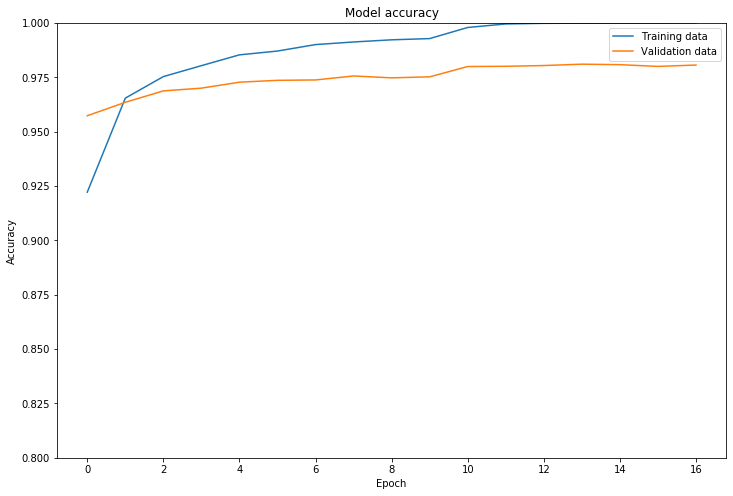

In [10]:
# plot the results and collect the data in a variable
exp1 = plot_results(model_his.history['accuracy'],
                    model_his.history['val_accuracy'], 1)

## Using the model  

In [12]:
def predict(index):
    # print a the selected digit image
    fig = plt.figure(figsize=(4, 4))
    a_digit = X_val[index].reshape(28, 28)
    plt.imshow(a_digit, cmap=matplotlib.cm.binary)
    fig.tight_layout()
    plt.show()
    # print the selected digits label
    print('The original digit label:', np.argmax(y_val[index]))
    # print the selected digits prediction
    print('The predicted label:', np.argmax(
        model.predict(X_val[index:index+1])))

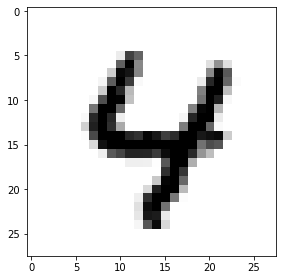

The original digit label: 4
The predicted label: 4


In [14]:
import matplotlib
predict(16555)

## What classifications is the model getting wrong?

In [15]:
# predict X_test
preds = model.predict(X_val)

# convert back from a categorical array to an array of the digits predicted and expected
num_preds = np.argmax(preds, axis=1)
num_y_val = np.argmax(y_val, axis=1)

In [16]:
# which numbers did the model get wrong?
# create a df to hold the results
result = pd.DataFrame({'preds': num_preds, 'y': num_y_val})
# label the inncorrect results
result['correct'] = result['preds'] == result['y']
# select the incorrect results
wrong = result[result['correct'] == False]
# which numbers did the model get wrong?
counts = dict(wrong['y'].value_counts())

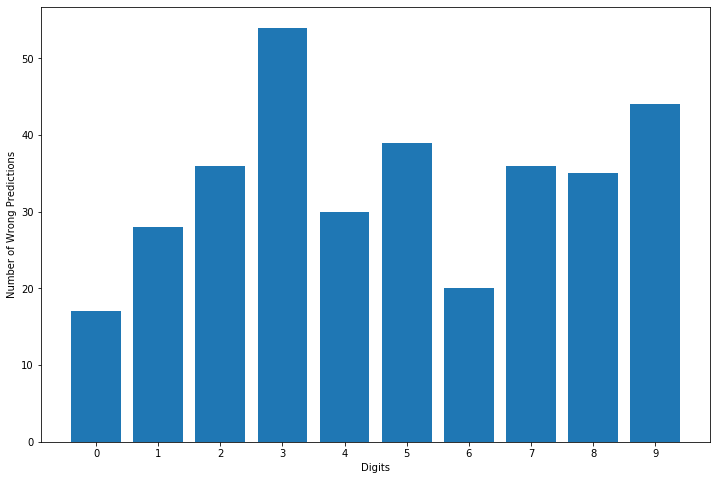

In [17]:
plt.figure(figsize=(12, 8))
plt.bar(counts.keys(), counts.values())
plt.xlabel('Digits')
plt.ylabel('Number of Wrong Predictions')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.show()

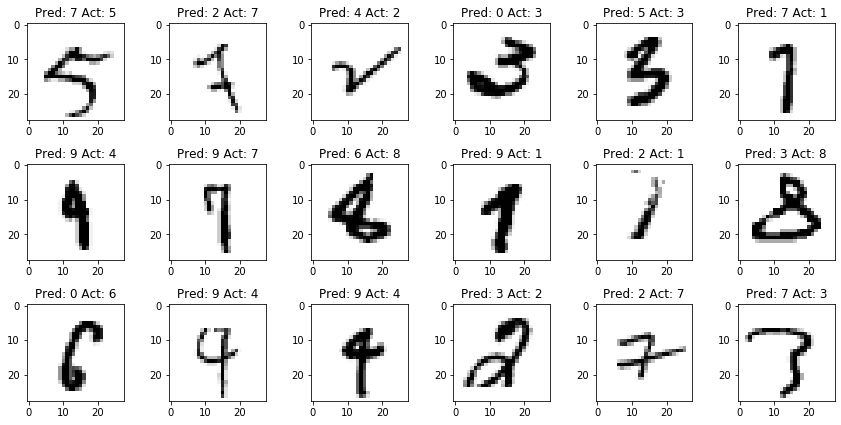

In [18]:
# select a short list of wrong predictions
w_list = wrong[:18].index

plt.figure(figsize=(12, 6))
for i, v in enumerate(w_list):
    plt.subplot(3,6,i+1)
    a_digit = X_val[v].reshape(28, 28)
    plt.imshow(a_digit, cmap=matplotlib.cm.binary)
    plt.title('Pred: {} Act: {}'.format(wrong['preds'][v], wrong['y'][v]))
    plt.xticks()
plt.tight_layout()
plt.show()

# Discovering Customer Segments/ Clusters

## Unsupervised Clustering  technique
Has the potential to uncover new customer segments

### K-Means clustering  
First we will use K-Means clustering algorithm, to visualise the multi dimensional data in a 2D space and see how the data clusters. We can use the K-Means attribute inertia to measure the quality of the cluster separation. A plot of cluster inertia vs the number of clusters can be used to determine an ideal number of clusters for the data.

In [19]:
from sklearn.cluster import KMeans
# reload the data
df_Xy = pd.read_csv('./X.csv')
X = df_Xy.drop(['y'], axis=1)
X = X[:1000]
# create a list of cluster numbers
clusters = list(range(1, 21))
# create a list to hold the inertia values
inertia = []
# loop through clusters and fit the data to each cluster size and collect the inertia data
for c in clusters:
    # create a K means instance
    kmn = KMeans(n_clusters=c)
    # use a sub set of X for live clustering
    kmn.fit(X)
    inertia.append(kmn.inertia_)
# create a dataframe to hold the results
df = pd.DataFrame({'inertia': inertia}, index=clusters)

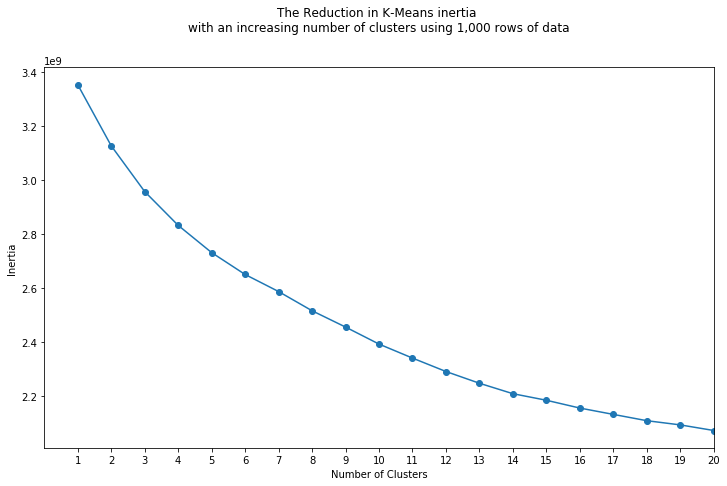

In [20]:
# plot the results
plt.figure(figsize=(12,7))
plt.plot(df.index, df['inertia'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Reduction in K-Means inertia \nwith an increasing number of clusters using 1,000 rows of data\n\n')
plt.xlim(0, 20)
plt.xticks(clusters)
plt.show()

### Plot the K-Means  clusters
How does the data look when clustered with K-Means? Below the clusters are plotted by the projecting the data into 2 dimensions, with 10 clusters to visualise how the well the clusters separate. 

In [21]:
# import the PCA module
from sklearn.decomposition import PCA

# generate the 10 clusters
kmn = KMeans(n_clusters=10, random_state=42)
kmn.fit_predict(X)

# get the cluster labels
Cluster = kmn.labels_

# use PCA to convert the 784 columns into a 2D space to graph the clusters
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# create a dataframe to hold the data to plot
km_df = pd.DataFrame(
    {'x': X[:, 0], 'y': X[:, 1], 'Cluster': Cluster, 'Label':df_Xy['y'][:1000]}, index=df_Xy[:1000].index)

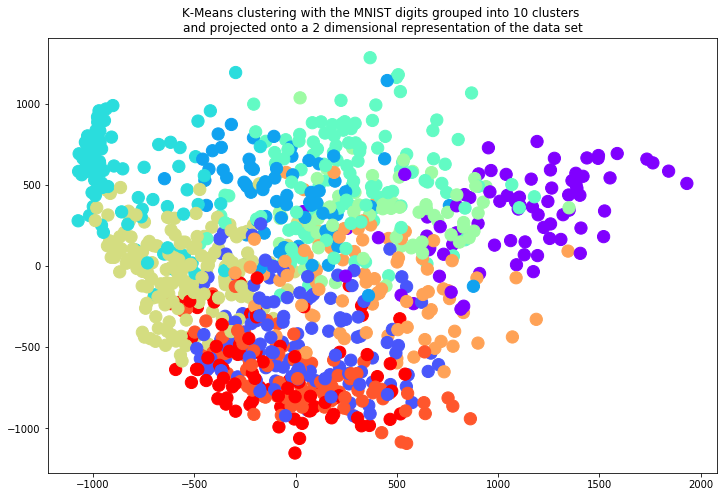

In [22]:
# plot the clusters
plt.figure(figsize=[12, 8])
plt.scatter(km_df['x'], km_df['y'], c=km_df['Cluster'], cmap='rainbow', s=150)
plt.title('K-Means clustering with the MNIST digits grouped into 10 clusters \nand projected onto a 2 dimensional representation of the data set')
plt.show()

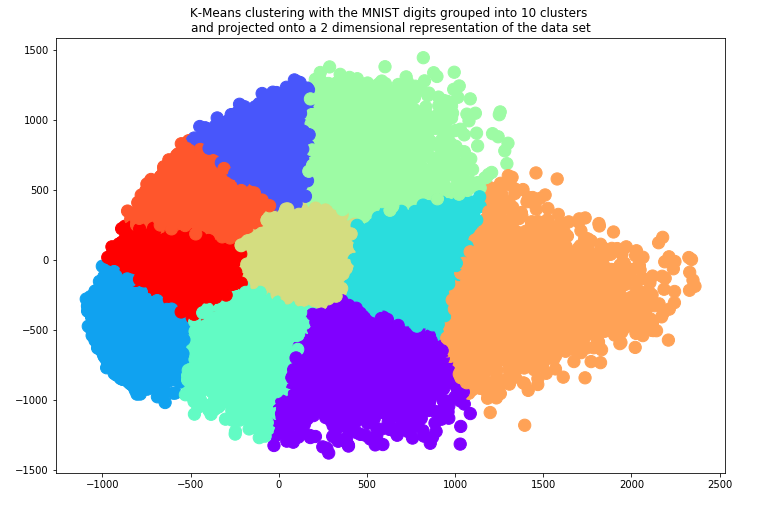

### What does the data look like?

In [23]:
km_df.head(10)

,x,y,Cluster,Label
0,203.122567,337.602003,4,5
1,1105.178133,425.716924,0,0
2,10.385092,-417.405094,1,4
3,-1012.902344,653.168941,3,1
4,-335.809985,-662.649218,8,9
5,196.938471,-101.278258,5,2
6,-638.158202,-21.261625,6,1
7,518.014325,592.622043,4,3
8,-757.035714,-121.975693,6,1
9,-94.538620,-477.702245,8,4


###  How good was the basic clustering compared to the original labels?

In [26]:
cluster_df =km_df[km_df['Cluster']==8]
cluster_df['Label'].value_counts()

4    59
9    42
7     6
5     1
Name: Label, dtype: int64

## Conclusion  
* Deep Learning can be applied to many business data science problems  
* On small amounts of data Deep Learning is comparable to SciKit Learn ML methods as data scales it becomes the natural choice  
* This was brief overview there are many more methods and applications being used and developed
